In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [5, 3.1]

# Today: Derivatives and dynamical models

Tom Ranner

# Recap

Yesterday, we thought about the concept of **rate of change**

> Speed is the rate of change of distance

> Instantaneous speed is the limit of average speeds over shorter and shorter time periods

$$
S(t) = \lim_{\mathrm{d}t \to 0} \frac{D(t + \mathrm{d}t) - D(t)}{\mathrm{d}t}.
$$

We also saw a geometric description:

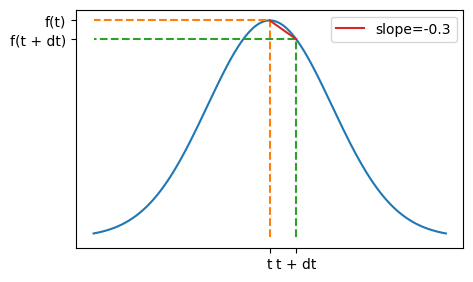

In [2]:
def f(x):
    return np.exp(-(x**2))


def plot(dt=1.0):
    t = np.linspace(-2, 2, 200)
    plt.plot(t, f(t))

    plt.plot([0, 0, -2], [0, f(0), f(0)], "--")
    plt.plot([dt, dt, -2], [0, f(dt), f(dt)], "--")

    slope = (f(dt) - f(0)) / dt
    plt.plot([0, dt], [f(0), f(dt)], label=f"{slope=:.1f}")

    plt.xticks([0, dt], ["t", "t + dt"])
    plt.yticks([f(0), f(dt)], ["f(t)", "f(t + dt)"])

    plt.legend()
    plt.show()


plot(0.3)

# More on graphs and derivatives

## Example 1

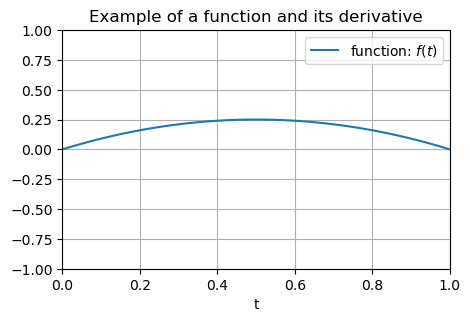

In [3]:
def f1(x):
    return x * (1.0 - x)


def df1(x):
    return 1.0 - 2.0 * x


t = np.linspace(0, 1)
y = f1(t)
yp = df1(t)

plt.plot(t, y, label="function: $f(t)$")

plt.title("Example of a function and its derivative")
plt.axis([0, 1, -1, 1])
plt.xlabel("t")
plt.legend()
plt.grid(True)
plt.show()

## Example 1

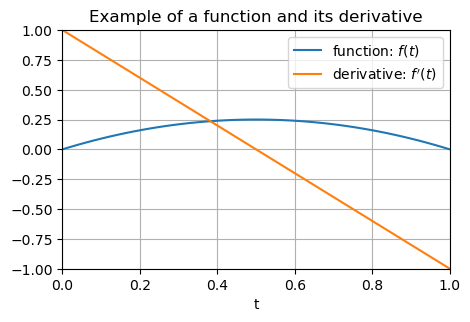

In [4]:
plt.plot(t, y, label="function: $f(t)$")
plt.plot(t, yp, label="derivative: $f'(t)$")

plt.title("Example of a function and its derivative")
plt.xlabel("t")
plt.axis([0, 1, -1, 1])
plt.legend()
plt.grid(True)
plt.show()

## Example 2

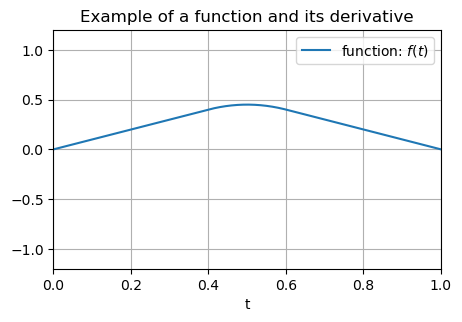

In [5]:
def f3(x):
    if type(x) == np.ndarray:
        return np.array([f3(xx) for xx in x])

    if x < 0.4:
        return x
    if x > 0.6:
        return 1 - x
    return -5 * x**2 + 5 * x - 0.8


def df3(x):
    if type(x) == np.ndarray:
        return np.array([df3(xx) for xx in x])

    if x < 0.4:
        return 1
    if x > 0.6:
        return -1
    return -10 * x + 5


t = np.linspace(0, 1, 1000)
y = f3(t)
yp = df3(t)

plt.plot(t, y, label="function: $f(t)$")

plt.title("Example of a function and its derivative")
plt.xlabel("t")
plt.axis([0, 1, -1.2, 1.2])
plt.legend()
plt.grid(True)
plt.show()

## Example 2

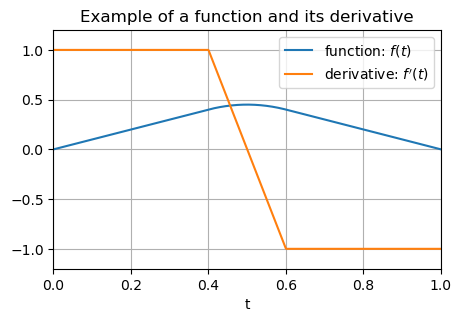

In [6]:
plt.plot(t, y, label="function: $f(t)$")
plt.plot(t, yp, label="derivative: $f'(t)$")

plt.title("Example of a function and its derivative")
plt.xlabel("t")
plt.axis([0, 1, -1.2, 1.2])
plt.legend()
plt.grid(True)
plt.show()

## Example 3

The population of Leeds over time (fitted):

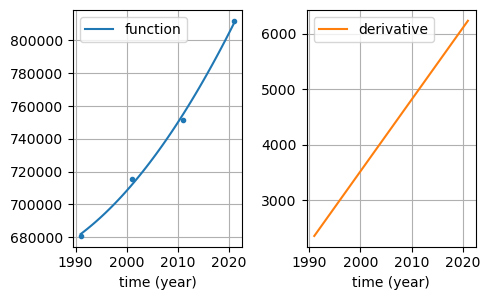

In [32]:
t = np.array([1991, 2001, 2011, 2021], dtype=np.double)
y = np.array([680739, 715399, 751485, 812000], dtype=np.double)

fit = np.polyfit(t, y, 2)

time = np.linspace(t[0], t[-1])
population = fit[0] * time**2 + fit[1] * time + fit[2]

derivative = 2 * fit[0] * time + fit[1]

fig, axs = plt.subplots(1, 2)

axs[0].plot(t, y, ".")
axs[0].plot(time, population, "C0", label="function")
axs[1].plot(time, derivative, "C1", label="derivative")

for ax in axs:
    ax.set_xlabel("time (year)")
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.grid()
    ax.legend()

plt.tight_layout()

# Differential equations

We have already seen $S(t) = D'(t)$.

This is an example of a **differential equation** - an equation which involves one or more derivatives.

We have seen (and computationally solved!) one example:

$$
D'(t) = -(t - 1.0) (t + 0.5) \text{ where } D(0) = 0.
$$

## An object in free fall

Consider a simple model for an object falling from a large height, based on two assumptions:

1. all objects are attracted downward with an **acceleration** due to gravity of $9.81\, \mathrm{m} / \mathrm{s}^2$
2. air resistance causes an object to **decelerate** in proportion to its spead

### What is the net acceleration on the object

> Acceleration is the rate of change of speed! $a(t) = S'(t)$

A positive value for $a(t)$ means that the speed is increasing whilst a negative value means that speed is decreasing.

We can write the *downwards* acceleration as

$$
a(t) = g - k S(t)
$$

(here $S(t)$ is the *downwards* speed)

So we have the differential equation:

$$
S'(t) = g - k S(t).
$$

## How can we solve this equation

> Try to do the same as last lecture, split the time interval into small time interval and assume everything is constant on each time interval.

We know that    
    
$$
S'(t) = \lim_{\mathrm{d}t \to 0} \frac{S(t + \mathrm{d}t) - S(t)}{\mathrm{d}t}
\approx \frac{S(t+ \mathrm{d}t) - S(t)}{\mathrm{d}t}
$$

for a small value of $\mathrm{d}t$.

Hence we can iterate

$$
S(t + \mathrm{d}t) = S(t) + \mathrm{d}t (g - k S(t)).
$$

## Python algorithm

In [ ]:
def freefall(n):
    """Input: n number of timesteps"""

    tfinal = 50.0  # Select the final time
    g = 9.81  # acceleration due to gravity (m/s)
    k = 0.2  # air resistance coefficient

    # initialise time and speed arrays array
    t = np.empty([n + 1, 1])
    s = np.empty([n + 1, 1])
    s[0], t[0] = 0.0, 0.0  # set initial conditions

    dt = (tfinal - t[0]) / n  # calculate step size

    # take n time steps, in which it is assumed that the acceleration
    # is constant in each small time interval
    for i in range(n):
        t[i + 1] = t[i] + dt
        s[i + 1] = s[i] + dt * (g - k * s[i])

    return t, s

## Python algorithm results

In [ ]:
for n in [10, 20, 40, 80]:
    t, s = freefall(n)
    plt.plot(t, s, label=f"{n=}")

plt.xlabel("time: t")
plt.ylabel("speed: s")
plt.grid()
plt.legend()
plt.show()

This approach works for any differential equation and is called **Euler's method**

# Euler's method

An approach that works for *any* differential equation involving just a single derivative:

$$
y'(t) = f(t, y(t)) \quad \text{subject to the initial condition} \quad y(t_0) = y_0.
$$

## General form:
    
$$
y'(t) = f(t, y(t)) \quad \text{subject to the initial condition} \quad y(t_0) = y_0.
$$

### Examples

$$y'(t) = -(t-1.0)(t-0.5) \quad\text{and}\quad y(0) = 0$$
$$y'(t) = g - k y(t) \quad\text{and}\quad y(0) = 0$$
$$y'(t) = -(y(t))^2 + \frac{1}{t} \quad\text{and}\quad y(1) = 2$$

## General algorithm

For differential equations in our general form, we have the following algorithm:

1. Set initial values for $t^{(0)}$ and $y^{(0)}$
2. Loop over all time steps, until the final time, updaing using the formulae:

   $$
   \begin{aligned}
   y^{(i+1)} & = y^{(i)} + \mathrm{d}t f(t^{(i)}, y^{(i)}) \\
   t^{(i+1)} & = t^{(i)} + \mathrm{d}t.
   \end{aligned}
   $$

### Example

Take three steps of Euler's method to approximate the solution of

$$
y'(t) = -(y(t))^2 + \frac{1}{t} \text{ subject to the initial condition } y(1) = 2
$$

for $1 \le t \le 2$.

In [ ]:
n = 3
t, y = np.empty([n + 1, 1]), np.empty([n + 1, 1])
t[0], y[0] = 1.0, 2.0


dt = (2.0 - t[0]) / n

for i in range(n):
    t[i + 1] = t[i] + dt
    y[i + 1] = y[i] + dt * (-y[i] * y[i] + 1 / t[i])

plt.plot(t, y, ".-")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

In [ ]:
for j in range(5):
    n = 3 * 2**j
    t, y = np.empty([n + 1, 1]), np.empty([n + 1, 1])
    t[0], y[0] = 1.0, 2.0

    dt = (2.0 - t[0]) / n

    for i in range(n):
        t[i + 1] = t[i] + dt
        y[i + 1] = y[i] + dt * (-y[i] * y[i] + 1 / t[i])

    plt.plot(t, y, label=f"{dt=}")

plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()
plt.show()

# Summary

-   Given the graph of $y(t)$ it is possible to sketch the graph of $y'(t)$ (with some care!).

-   Computational models which involve dynamic processes usually involve the use of derivatives.

-   An equation which includes a derivative is known as a **differential equation**.

-   To solve a differential equation it is necessary to know some information about the solution at some starting point (e.g. initial distance travelled, initial speed, population at a given point in time, etc.).

-   One computational approach to solve such equations is **Euler's method** - which gets more accurate with more sub-intervals used.